Creates bandwidth statistics for the H.264 an MPJPEG video stream.

## How to get the graph

Open the tcpdump, created for the framerate analysis, in Wireshark (used version: 4.2.3). Open "Statistics / IO Graphs" and make sure "all Packets" is selected. Save the graph as CSV.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
h264_with_activity_inputFile    = 'h264_with_activity_bandwidth.csv'
h264_without_activity_inputFile = 'h264_without_activity_bandwidth.csv'
mpjpeg95_inputFile              = 'mpjpeg-quality_95.csv'
mpjpeg50_inputFile              = 'mpjpeg-quality_50.csv'
mpjpeg25_inputFile              = 'mpjpeg-quality_25.csv'

def download(filename):
  response = requests.get('https://raw.githubusercontent.com/tederer/octowatch-evaluation/main/measurements/bandwidth/' + filename)
  with open(filename, 'wb') as fd:
      for chunk in response.iter_content(chunk_size=128):
          fd.write(chunk)

download(h264_with_activity_inputFile)
download(h264_without_activity_inputFile)
download(mpjpeg95_inputFile)
download(mpjpeg50_inputFile)
download(mpjpeg25_inputFile)

In [3]:
h264_with_activity_CsvFile    = pd.read_csv(h264_with_activity_inputFile, sep=',')
h264_without_activity_CsvFile = pd.read_csv(h264_without_activity_inputFile, sep=',')
mpjpeg95_CsvFile              = pd.read_csv(mpjpeg95_inputFile, sep=',')
mpjpeg50_CsvFile              = pd.read_csv(mpjpeg50_inputFile, sep=',')
mpjpeg25_CsvFile              = pd.read_csv(mpjpeg25_inputFile, sep=',')

lineCount = min(mpjpeg95_CsvFile.shape[0], min(h264_with_activity_CsvFile.shape[0], h264_without_activity_CsvFile.shape[0]))

h264_with_activity    = []
h264_without_activity = []
mpjpeg95              = []
mpjpeg50              = []
mpjpeg25              = []

for index in range(0, lineCount):
  mpjpeg95_Row              = mpjpeg95_CsvFile.iloc[index]
  mpjpeg50_Row              = mpjpeg50_CsvFile.iloc[index]
  mpjpeg25_Row              = mpjpeg25_CsvFile.iloc[index]
  h264_with_activity_Row    = h264_with_activity_CsvFile.iloc[index]
  h264_without_activity_Row = h264_without_activity_CsvFile.iloc[index]
  mpjpeg95.append(float(mpjpeg95_Row['All Packets']) * 8 / 1000000)
  mpjpeg50.append(float(mpjpeg50_Row['All Packets']) * 8 / 1000000)
  mpjpeg25.append(float(mpjpeg25_Row['All Packets']) * 8 / 1000000)
  h264_with_activity.append(float(h264_with_activity_Row['All Packets']) * 8 / 1000000)
  h264_without_activity.append(float(h264_without_activity_Row['All Packets']) * 8 / 1000000)

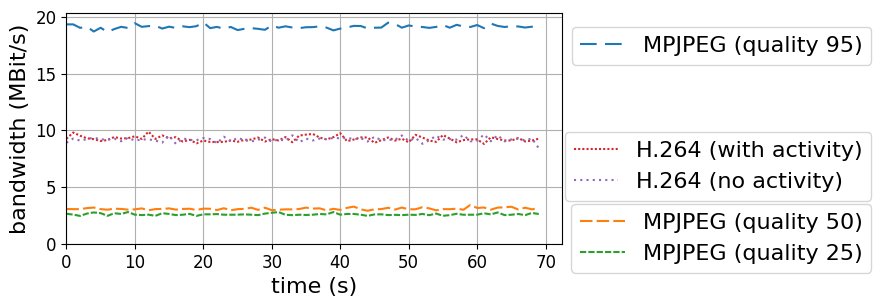

In [4]:
plt.rcParams.update({'font.size': 12})

figure, fpsPerFrameAxis = plt.subplots(figsize=(6.4, 3))
mpjpeg95Line,               = fpsPerFrameAxis.plot(mpjpeg95,              label = 'MPJPEG (quality 95)', linestyle = (0, (8, 4)))
mpjpeg50Line,               = fpsPerFrameAxis.plot(mpjpeg50,              label = 'MPJPEG (quality 50)', linestyle = (0, (6, 2)))
mpjpeg25Line,               = fpsPerFrameAxis.plot(mpjpeg25,              label = 'MPJPEG (quality 25)', linestyle = (0, (3, 1)))
h264_with_activity_Line,    = fpsPerFrameAxis.plot(h264_with_activity,    label = 'H.264 (with activity)',  linestyle = (0, (1, 1)))
h264_without_activity_Line, = fpsPerFrameAxis.plot(h264_without_activity, label = 'H.264 (no activity)', linestyle = (0, (1, 2)))

fpsPerFrameAxis.set_xlabel('time (s)', fontsize=16)
fpsPerFrameAxis.set_ylabel('bandwidth (MBit/s)', fontsize=16)
fpsPerFrameAxis.set_xlim(0)
fpsPerFrameAxis.set_ylim(0)
fpsPerFrameAxis.grid(True)

legend = figure.legend(handles = [mpjpeg95Line], bbox_to_anchor=(1.4, 0.87), fontsize=16)
legend = figure.legend(handles = [h264_with_activity_Line, h264_without_activity_Line], bbox_to_anchor=(1.4, 0.52), fontsize=16)
legend = figure.legend(handles = [mpjpeg50Line, mpjpeg25Line], bbox_to_anchor=(1.4, 0.28), fontsize=16)

figure.savefig('bandwidth.png', bbox_extra_artists=(legend,), bbox_inches='tight', pad_inches=0.05, dpi=300)